## Film calibration (Alejandro-48H)

### Importar librerias

In [1]:
from tools.image import load
from pathlib import Path

### Dosis usadas para calibración

In [2]:
imparted_doses = [0, 0.5, 1, 1.5, 2, 3, 5, 8, 10]

### Lectura de archivo para calibración



In [3]:
#file_path = Path("/home/luis/Downloads") / "POS48_1.tif"  # Office PC
file_path = Path("/home/luis/Descargas") / "POS48_1.tif" # Personal laptop
cal_image = load(file_path, for_calib = True)

### Obtener curva de calibración


Number of images detected: 9


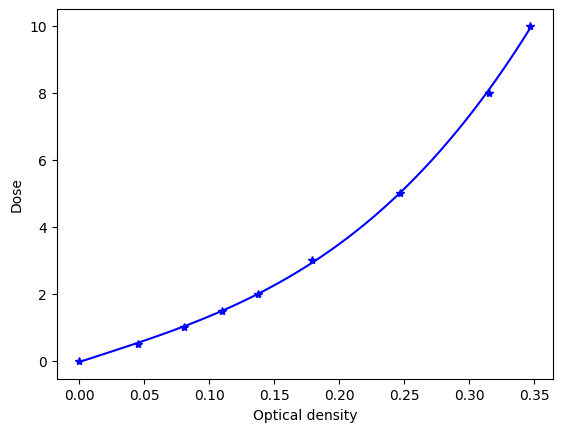

<Axes: xlabel='Optical density', ylabel='Dose'>

In [4]:
cal = cal_image.get_calibration(doses = imparted_doses, channel = "B", roi = (16, 8), func = "P3")
cal.plot(color = 'blue')

### Mostrar ROIs y valores medios de pixel.

Number of images detected: 9


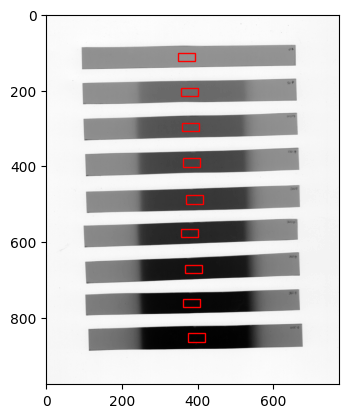

([27037, 24361, 22472, 20990, 19708, 17912, 15330, 13098, 12165],
 [131, 157, 138, 148, 134, 163, 143, 127, 288])

In [5]:
cal_image.get_stat(ch = 'B', roi = (16, 8), show = True)

## Verificación

Number of images detected: 3


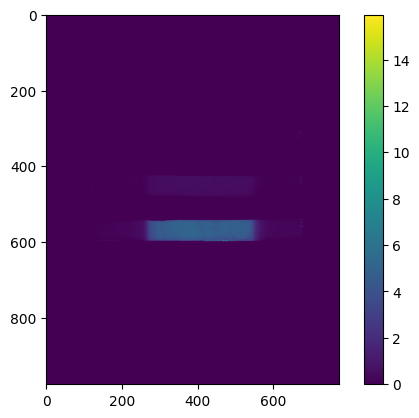

In [6]:
#Lectura de archivo
#verif_path = Path("/home/luis/Downloads") / "VERIFICACION_1.tif"  # Office PC
verif_path = Path("/home/luis/Descargas") / "VERIFICACION_1.tif" # Personal laptop
verif = load(verif_path)

dose_img = verif.to_dose(cal)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)


Number of images detected: 3


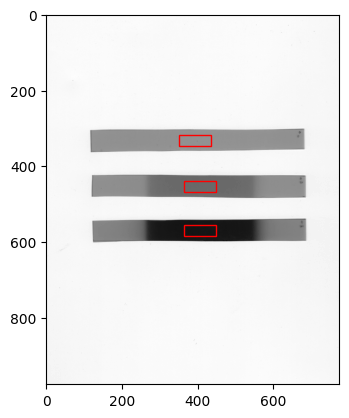

Dosis por ajuste: [0.         0.55554498 4.98760468]


In [7]:
import numpy as np
from tools.calibration import polynomial_g3

mean_pixel, _ = verif.get_stat(ch = "B", roi = (30, 10), show = True)
mean_pixel = sorted(mean_pixel, reverse = True)
#mean_pixel

optical_density = -np.log10(np.array(mean_pixel)/mean_pixel[0])

dosis_from_fit = polynomial_g3(optical_density, *cal.popt)
dosis_from_fit[dosis_from_fit < 0] = 0 # Remove doses < 0

print(f"Dosis por ajuste: {dosis_from_fit}")


### Numpy to bytes and cGy

In [8]:
import imageio.v3 as iio
#%matplotlib qt

data = np.int64(dose_img*100) # Gy to cGy

np_tif = data.astype(np.uint16)
png_encoded = iio.imwrite("<bytes>", np_tif, extension=".tif")


### Save as a tiff file (useful for imageJ analysis)

In [9]:
with open('test.tif', 'wb') as f: 
    f.write(png_encoded)

In [10]:
%matplotlib qt

In [11]:
plt.imshow(dose_img)

## Calibración con vidrio y tapa

In [12]:
#file_path_3 = Path("/home/luis/Downloads") / "POS48_3.tif"  # Office PC
file_path_3 = Path("/home/luis/Descargas") / "POS48_3.tif" # Personal laptop
cal_image_3 = load(file_path_3, for_calib = True)

In [13]:
cal_3 = cal_image_3.get_calibration(doses = imparted_doses, channel = "B", roi = (16, 8), func = "P3")
cal_3.plot(color = 'blue')

Number of images detected: 9


<Axes: xlabel='Optical density', ylabel='Dose'>

In [14]:
cal_image_3.get_stat(ch = 'B', roi = (16, 8), show = True)

Number of images detected: 9


([26189, 23714, 21936, 20510, 19239, 17554, 15065, 12862, 12018],
 [100, 138, 121, 120, 112, 162, 122, 116, 303])

In [15]:
#verif_path_3 = Path("/home/luis/Downloads") / "VERIFICACION_3.tif"  # Office PC
verif_path_3 = Path("/home/luis/Descargas") / "VERIFICACION_3.tif" # Personal laptop
verif_3 = load(verif_path_3)

In [16]:
mean_pixel_3, _ = verif_3.get_stat(ch = "B", roi = (30, 10), show = True)
mean_pixel_3 = sorted(mean_pixel_3, reverse = True)
#mean_pixel

optical_density_3 = -np.log10(np.array(mean_pixel_3)/mean_pixel_3[0])

dosis_from_fit_3 = polynomial_g3(optical_density_3, *cal_3.popt)
dosis_from_fit_3[dosis_from_fit_3 < 0] = 0 # Remove doses < 0

print(f"Dosis por ajuste: {dosis_from_fit_3}")


Number of images detected: 3
Dosis por ajuste: [0.         0.55927187 4.88734627]
